### Lab 1. 1D search methods

1. Implement methods: Dichotomy, golden-section search, Fibonacci, Successive parabolic search, Brent's method.
2. Check on unimodal functions of different nature (discussed in lectures)
3. Test on many-modal functions.
4. Create plots: the number of iterations/calculations of the function versus accuracy, the dynamics of the uncertainty interval for the given function.
5. Bonus: measuring code execution time. It is recommended to run several times for averaging.

### 1.
Implement methods:
1. Dichotomy search
2. Golden-section search
3. Fibonacci search
4. Successive parabolic interpolation
5. Brent's method

---

In [211]:
import numpy as np
from typing import Callable

In [212]:
def dichotomy_search(f: Callable[[float], float], a: float, b: float, eps=1e-9):
    if b < a:
        a, b = b, a
    
    w = eps / 3
    # w < eps/2
    while abs(b - a) > eps:
        c = (a + b) * 0.5
        d = c - w
        e = c + w
        if f(d) < f(e):
            b = e
        else:
            a = d

    return (b + a) / 2

In [213]:
def golden_section_search(f: Callable[[float], float], a: float, b: float, eps=1e-9):
    if b < a:
        a, b = b, a
    # a < x < y < b
    # (b-a)/(b-x) = (b-x)/(x-a)
    # (b-a)(x-a) = (b-x)(b-x)
    # (b-a)(-(b-x)+b-a) = (b-x)(b-x)
    # (b-a)(-z+b-a) = z^2
    # 0 = z^2 + z(b-a) - (b-a)^2
    # z = (a-b)/2 +- sqrt(5)/2(b-a)
    # z = b - x = (-1 +- sqrt(5))/2 (b-a)
    # x = b + (1 -+ sqrt(5))/2 (b-a)
    #   = b - (sqrt(5) - 1)/2 (b-a)
    # y = a + (sqrt(5) - 1)/2 (b-a)
    
    # golden ratio
    gr = (5**0.5 - 1) / 2
    while abs(b - a) > eps:
        x = b - (b - a) * gr
        y = a + (b - a) * gr
        if f(x) < f(y):
            b = y
        else:
            a = x

    return (b + a) / 2

In [214]:
def fibonacci_search(f: Callable[[float], float], a: float, b: float, eps=1e-9):
    if b < a:
        a, b = b, a
    # a < x < y < b
    # x - a = b - y

    # Ln = an - bn = w < eps
    # xn = an + w / 2
    # yn = bn - w / 2 = xn

    # Ln-1 = 2 Ln - w / 2
    # Ln-2 = Ln-1 + Ln

    # Ln   =  1  * w = 2 * w / 2   | ...
    # Ln-1 = 1.5 * w = 3 * w / 2   | ....
    # Ln-2 = 2.5 * w = 5 * w / 2   | .. ..
    # Ln-3 =         = 8 * w / 2   | .  ..  .
    # Ln-3 =         = 13 * w / 2  | .   .  .   .

    # |=> Lk = Fn+3-k * w / 2
    #    Fn+2 = Fn+1 + Fn
    #    F0 = 0
    #    F1 = 1

    # xn-1 = an-1 + 1 * w / 2
    # yn-1 = an-1 + 2 * w / 2
    # xn-2 = an-2 + 2 * w / 2
    # yn-2 = an-2 + 3 * w / 2
    # =>
    # xk = ak + Lk+2
    # yk = ak + Lk+1

    # eps ~ Fn ?
    # L0 = Fn+3 * w / 2
    # 2 * L0 / Fn+3 = w < eps
    # =>
    # Fn+3 > 2 * (b - a) / eps

    def F(k: int) -> int:
        """-> nth fibonacci number"""
        assert type(n) is int
        if k < 0:
            return None
        if not hasattr(fibonacci_search, "fib_dict"):
            # init hash
            fibonacci_search.fib_dict = dict()
            fibonacci_search.fib_dict[0] = 0
            fibonacci_search.fib_dict[1] = 1

        if k not in fibonacci_search.fib_dict:
            fibonacci_search.fib_dict[k] = F(k - 2) + F(k - 1)

        return fibonacci_search.fib_dict[k]

    # find n
    n = 0
    while 2 * (b - a) >= eps * F(n + 3):
        n += 1

    def L(k: int) -> float:
        # 2 * L0 / Fn+3 = w
        # Lk = Fn+3-k * w / 2
        # =>
        # Lk = Fn+3-k * L0 / Fn+3
        assert n + 3 - k >= 0
        assert n + 3 >= 0
        return F(n + 3 - k) / F(n + 3) * (b - a)

    assert L(n + 2) == L(n + 1)
    ak = a
    x = ak + L(2)
    y = ak + L(1)
    fx = f(x)
    fy = f(y)
    for k in range(1, n + 1):
        if fx < fy:
            # a     x y b
            # a (x) y b
            y = x
            fy = fx
            x = ak + L(k + 2)
            fx = f(x)
        else:
            # a x y     b
            #   a x (y) b
            ak = x
            x = y
            fx = fy
            y = ak + L(k + 1)
            fy = f(y)
    return x

In [215]:
def spi(f: Callable[[float], float], a: float, b: float, eps=1e-9):
    if b < a:
        a, b = b, a
    # a < (x < y) < b
    # ->
    # x1 < x2 < x3
    x1 = a
    x2 = (b + a) / 2
    x3 = b
    f1 = f(x1)
    f2 = f(x2)
    f3 = f(x3)
    # f(x) ~= p(x) = a x^2 + b x + c
    # f1 = a x1^2 + b x1 + c
    # f2 = a x2^2 + b x2 + c
    # f3 = a x3^2 + b x3 + c

    # f1 - f2 = a (x1^2 - x2^2) + b (x1 - x2)
    # f2 - f3 = a (x2^2 - x3^2) + b (x2 - x3)
    # [F1]   [ X1 X2 ] [a]
    # [F2] = [ X3 X4 ] [b]
    # =>
    # [a]   [ X4  -X2 ] [F1]
    # [b] = [ -X3  X1 ] [F2] / (X1 X4 - X2 X3)

    # u = - b / (2 a)
    #   = - (-X3 F1 + X1 F2)/(2 * (X4 F1 - X2 F2))
    #   = (X3 F1 - X1 F2)/(2 * (X4 F1 - X2 F2))
    while abs(x3 - x1) > eps:
        X1 = x1**2 - x2**2
        X2 = x1 - x2
        X3 = x2**2 - x3**2
        X4 = x2 - x3
        F1 = f1 - f2
        F2 = f2 - f3
        if (X4 * F1 - X2 * F2) == 0.:
            return x2
        u = (X3 * F1 - X1 * F2) / (2 * (X4 * F1 - X2 * F2))
        fu = f(u)
        if not (x1 < u < x3):
            return x2
        # sort
        if u < x2:
            x2, u = u, x2
            f2, fu = fu, f2
        # print(x1, x2, u, x3)
        if f2 < fu:
            # x1 x2     u  x3
            # x1 x2 (u) x3
            x3 = u
            f3 = fu
        else:
            # x1 x2 u      x3
            #    x1 x2 (u) x3
            x1 = x2
            x2 = u
            f1 = f2
            f2 = fu

    return (x1 + x3) / 2

In [ ]:
def brent_search(f: Callable[[float], float], a: float, b: float, eps=1e-9):
    

### 2.
Check on unimodal functions of different nature (discussed in lectures)

---

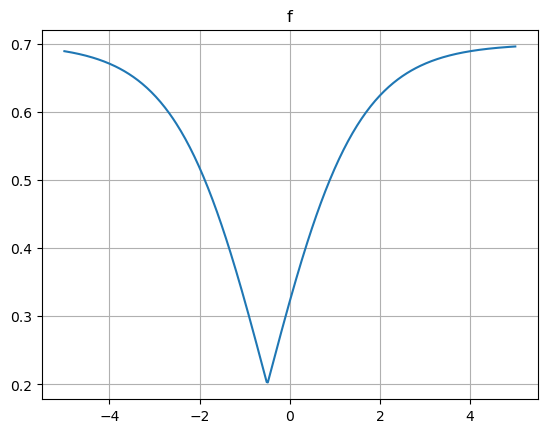

In [216]:
import numpy as np
import matplotlib.pyplot as plt


def f(x):
    return 1 / (1 + np.exp(-np.abs(x + 0.5))) - 0.3


x = np.linspace(-5, 5, num=400)
y = [f(i) for i in x]

plt.plot(x, y)
plt.title("f")
plt.grid(True)
plt.show()

In [217]:
a = -5
b = 5
print(dichotomy_search(f, a, b), 
golden_section_search(f, a, b),
fibonacci_search(f,a,b),
spi(f,a,b),
)

-0.4999999999957704 -0.5000000000516955 -0.5000000001473116 -0.5
